<a href="https://colab.research.google.com/github/fabianoseller/PucPosEstat/blob/main/Em_python_pensando_em_estatistica_de_testes_param%C3%A9tricos_para_2_popula%C3%A7%C3%B5es_Desempenho_em_um_teste_de_matem%C3%A1tica_de_alunos_de_duas_escolas_diferentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Para testes paramétricos entre duas populações em Python, as ferramentas mais comuns e poderosas são as bibliotecas SciPy e Statsmodels. Elas oferecem implementações prontas para os testes mais utilizados.

Vamos focar nos dois testes paramétricos mais importantes para comparar duas populações:

Teste t de Student para amostras independentes: Usado quando você tem duas amostras de grupos diferentes.
Teste t de Student para amostras pareadas: Usado quando as amostras estão relacionadas (por exemplo, medições antes e depois no mesmo grupo de indivíduos).
1. Teste t de Student para Amostras Independentes
Este teste é usado para determinar se existe uma diferença estatisticamente significativa entre as médias de duas populações independentes.

Pré-requisitos:

Normalidade: Os dados em cada grupo devem seguir uma distribuição aproximadamente normal.
Homocedasticidade (opcional, mas importante): As variâncias dos dois grupos devem ser aproximadamente iguais. Se não forem, o SciPy tem uma opção para isso.
Exemplo em Python:

Vamos imaginar que você está comparando o desempenho em um teste de matemática de alunos de duas escolas diferentes.

Média Escola A: 68.12
Média Escola B: 73.01



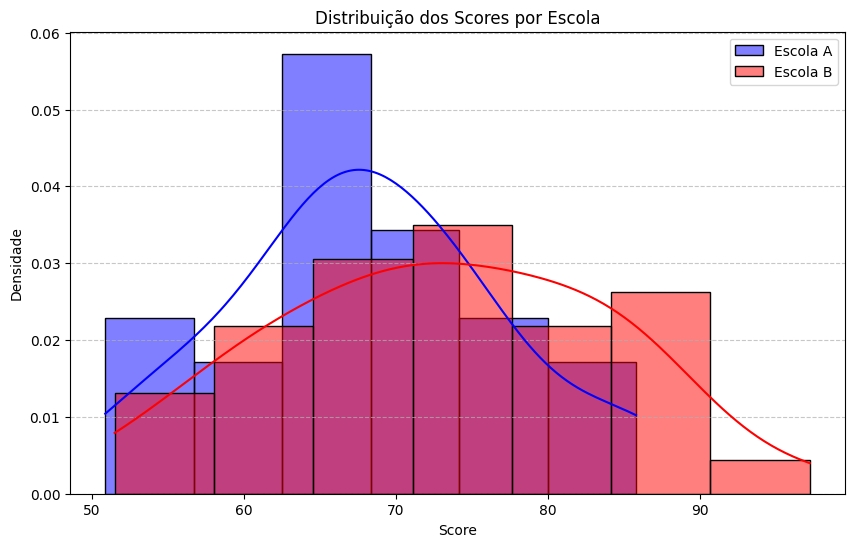

Teste de Levene para igualdade de variâncias:
Estatística de Levene: 1.999
P-valor (Levene): 0.162
As variâncias não são significativamente diferentes. Usaremos 'equal_var=True' (ou não especificar).

--- Resultado do Teste t de Student para Amostras Independentes ---
Estatística t: -1.951
P-valor: 0.056

Nível de significância (alpha): 0.05
Conclusão: Não rejeitamos a hipótese nula.
Não há evidência estatística de uma diferença significativa entre as médias dos scores da Escola A e Escola B.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gerando dados de exemplo ---
# Escola A: Média 70, Desvio Padrão 10, N=30
np.random.seed(42) # Para reprodutibilidade
escola_a_scores = np.random.normal(loc=70, scale=10, size=30)

# Escola B: Média 75, Desvio Padrão 12, N=35
escola_b_scores = np.random.normal(loc=75, scale=12, size=35)

print(f"Média Escola A: {np.mean(escola_a_scores):.2f}")
print(f"Média Escola B: {np.mean(escola_b_scores):.2f}\n")

# --- Visualizando as distribuições (opcional, mas recomendado) ---
plt.figure(figsize=(10, 6))
sns.histplot(escola_a_scores, color='blue', label='Escola A', kde=True, stat='density')
sns.histplot(escola_b_scores, color='red', label='Escola B', kde=True, stat='density')
plt.title('Distribuição dos Scores por Escola')
plt.xlabel('Score')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Realizando o Teste t de Student ---
# stats.ttest_ind(a, b, equal_var=True)
# equal_var=True assume variâncias iguais (teste t padrão)
# equal_var=False aplica o teste de Welch (para variâncias desiguais, mais robusto)

# Primeiro, podemos testar a igualdade de variâncias usando o teste de Levene
# (hipótese nula: variâncias são iguais)
levene_statistic, p_value_levene = stats.levene(escola_a_scores, escola_b_scores)
print(f"Teste de Levene para igualdade de variâncias:")
print(f"Estatística de Levene: {levene_statistic:.3f}")
print(f"P-valor (Levene): {p_value_levene:.3f}")

if p_value_levene < 0.05:
    print("As variâncias são significativamente diferentes. Usaremos 'equal_var=False'.")
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=False)
else:
    print("As variâncias não são significativamente diferentes. Usaremos 'equal_var=True' (ou não especificar).")
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=True)

print("\n--- Resultado do Teste t de Student para Amostras Independentes ---")
print(f"Estatística t: {t_statistic:.3f}")
print(f"P-valor: {p_value_ttest:.3f}")

# --- Interpretação ---
alpha = 0.05
print(f"\nNível de significância (alpha): {alpha}")
if p_value_ttest < alpha:
    print("Conclusão: Rejeitamos a hipótese nula.")
    print("Existe uma diferença estatisticamente significativa entre as médias dos scores da Escola A e Escola B.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula.")
    print("Não há evidência estatística de uma diferença significativa entre as médias dos scores da Escola A e Escola B.")

## Explicação:

#### Geração de Dados: Criamos dois arrays numpy para simular os scores das duas escolas.
Visualização: O histograma ajuda a ter uma ideia visual da distribuição dos dados em cada grupo.
Teste de Levene: É uma boa prática verificar a homocedasticidade (igualdade de variâncias) antes do teste t. Se o p-valor do teste de Levene for menor que seu nível de significância (e.g., 0.05), significa que as variâncias são diferentes e você deve usar equal_var=False no ttest_ind (teste de Welch), que é mais robusto para essa situação.
stats.ttest_ind(): Esta função calcula a estatística t e o p-valor.
Interpretação do P-valor:
Se p-valor < alpha (nível de significância): Rejeitamos a hipótese nula (H0). Isso significa que há evidência estatística de uma diferença significativa entre as médias das duas populações.
Se p-valor >= alpha: Não rejeitamos a hipótese nula. Não há evidência estatística suficiente para concluir que as médias são diferentes.

## 2. Teste t de Student para Amostras Pareadas
Este teste é usado quando as medições são feitas no mesmo conjunto de indivíduos ou unidades em duas condições diferentes (por exemplo, antes e depois de um tratamento). O teste avalia se a média das diferenças entre as medições é significativamente diferente de zero.

Pré-requisitos:

Normalidade das diferenças: As diferenças entre as observações pareadas devem seguir uma distribuição aproximadamente normal.
Exemplo em Python:

Imagine que você está testando a eficácia de um novo programa de treinamento. Você mede o desempenho dos participantes antes e depois do programa.

Média Desempenho Antes: 58.69
Média Desempenho Depois: 62.25

Média das Diferenças: 3.56



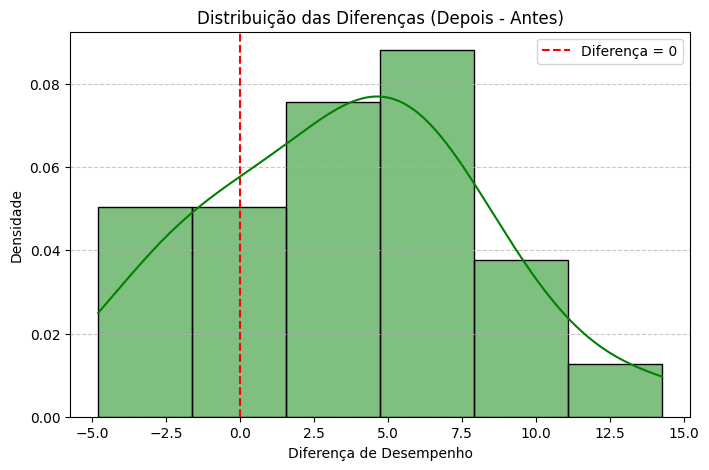


--- Resultado do Teste t de Student para Amostras Pareadas ---
Estatística t: -3.849
P-valor: 0.001

Nível de significância (alpha): 0.05
Conclusão: Rejeitamos a hipótese nula.
Existe uma diferença estatisticamente significativa no desempenho antes e depois do programa de treinamento.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gerando dados de exemplo ---
np.random.seed(42)
# Desempenho 'Antes': Média 60, Desvio Padrão 8
desempenho_antes = np.random.normal(loc=60, scale=8, size=25)

# Desempenho 'Depois': Espera-se um aumento.
# Adicionamos um efeito médio de 5 pontos e algum ruído
desempenho_depois = desempenho_antes + np.random.normal(loc=5, scale=5, size=25)

print(f"Média Desempenho Antes: {np.mean(desempenho_antes):.2f}")
print(f"Média Desempenho Depois: {np.mean(desempenho_depois):.2f}\n")

# --- Calculando as diferenças ---
diferencas = desempenho_depois - desempenho_antes
print(f"Média das Diferenças: {np.mean(diferencas):.2f}\n")

# --- Visualizando a distribuição das diferenças ---
plt.figure(figsize=(8, 5))
sns.histplot(diferencas, color='green', kde=True, stat='density')
plt.title('Distribuição das Diferenças (Depois - Antes)')
plt.xlabel('Diferença de Desempenho')
plt.ylabel('Densidade')
plt.axvline(x=0, color='red', linestyle='--', label='Diferença = 0')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# --- Realizando o Teste t de Student para Amostras Pareadas ---
# stats.ttest_rel(a, b)
t_statistic, p_value_ttest_paired = stats.ttest_rel(desempenho_antes, desempenho_depois)

print("\n--- Resultado do Teste t de Student para Amostras Pareadas ---")
print(f"Estatística t: {t_statistic:.3f}")
print(f"P-valor: {p_value_ttest_paired:.3f}")

# --- Interpretação ---
alpha = 0.05
print(f"\nNível de significância (alpha): {alpha}")
if p_value_ttest_paired < alpha:
    print("Conclusão: Rejeitamos a hipótese nula.")
    print("Existe uma diferença estatisticamente significativa no desempenho antes e depois do programa de treinamento.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula.")
    print("Não há evidência estatística de uma diferença significativa no desempenho antes e depois do programa de treinamento.")

## Explicação:

Geração de Dados: Criamos desempenho_antes e desempenho_depois, com o depois construído para ter uma média ligeiramente maior que o antes.
Cálculo das Diferenças: O teste pareado na verdade trabalha com a distribuição das diferenças entre as observações.
Visualização das Diferenças: Um histograma das diferenças ajuda a verificar a normalidade das diferenças e se a média está próxima de zero.
stats.ttest_rel(): Esta função calcula a estatística t e o p-valor para amostras pareadas.

#### Interpretação do P-valor: A lógica é a mesma do teste independente:
Se p-valor < alpha: Rejeitamos a hipótese nula (H0), que neste caso é que a média das diferenças é zero. Isso significa que o programa de treinamento teve um efeito significativo.
Se p-valor >= alpha: Não rejeitamos H0. Não há evidência estatística de que o programa de treinamento fez uma diferença significativa.
Considerações Importantes
### Normalidade: Para ambos os testes t, a suposição de normalidade é importante. Para amostras pequenas (n < 30), você pode usar testes de normalidade (como Shapiro-Wilk: stats.shapiro()). Para amostras grandes, o Teorema do Limite Central ajuda, e o teste t é mais robusto contra desvios de normalidade. Se a normalidade não for atendida, considere testes não paramétricos (e.g., Mann-Whitney U para independentes, Wilcoxon Signed-Rank para pareados).

## Tamanho da Amostra: Testes paramétricos geralmente exigem tamanhos de amostra razoáveis para ter poder estatístico.
Nível de Significância (alpha): O valor comum é 0.05, mas ele deve ser definido antes de rodar o teste com base no contexto da sua pesquisa.
Hipóteses:
Nula (H0): Geralmente afirma que não há diferença ou efeito (ex: médias são iguais).
Alternativa (H1): Afirma que há uma diferença ou efeito (ex: médias são diferentes).
Direção do Teste (Unilateral/Bilateral): Os exemplos acima são para testes bilaterais (duas caudas), verificando se as médias são simplesmente diferentes. Se você tem uma expectativa de que uma média será maior ou menor que a outra, você faria um teste unilateral (uma cauda), que requer um ajuste no p-valor (geralmente dividindo por 2 ou usando o parâmetro alternative em algumas funções).

 *Espero que esses exemplos detalhados te ajudem a aplicar testes paramétricos em Python para suas análises estatísticas!*

Boxplot do desempenho Antes e Depois gerado e salvo como 'boxplot_desempenho_antes_depois_final.png'


/tmp/ipython-input-6-1903818721.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Momento', y='Desempenho', data=df_combined, palette={'Antes': 'skyblue', 'Depois': 'lightcoral'})


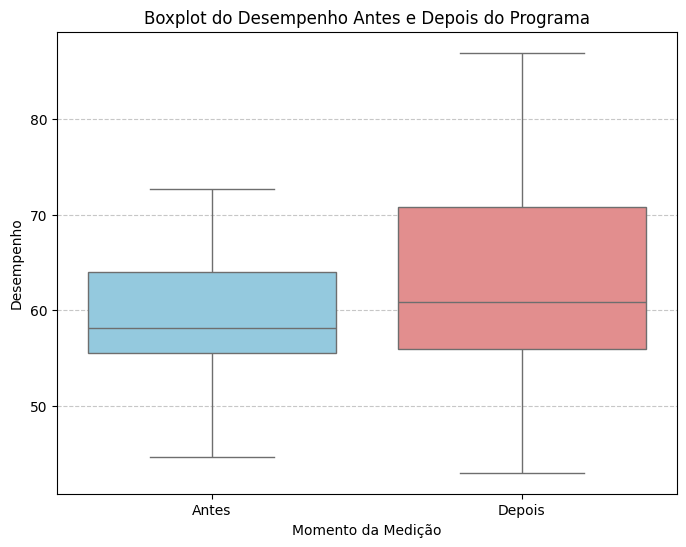

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Gerando dados de exemplo ---
np.random.seed(42) # Define a semente para reprodutibilidade
desempenho_antes = np.random.normal(loc=60, scale=8, size=25) # Desempenho 'Antes'
desempenho_depois = desempenho_antes + np.random.normal(loc=5, scale=5, size=25) # Desempenho 'Depois' (com aumento)

# --- Preparando os dados para o Boxplot ---
# Combina os dados 'Antes' e 'Depois' em um único DataFrame
data_combined = {
    'Desempenho': np.concatenate([desempenho_antes, desempenho_depois]),
    'Momento': ['Antes'] * len(desempenho_antes) + ['Depois'] * len(desempenho_depois)
}
df_combined = pd.DataFrame(data_combined)

# --- Gerando o Boxplot com Seaborn ---
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.boxplot(x='Momento', y='Desempenho', data=df_combined, palette={'Antes': 'skyblue', 'Depois': 'lightcoral'})
plt.title('Boxplot do Desempenho Antes e Depois do Programa') # Título do gráfico
plt.xlabel('Momento da Medição') # Rótulo do eixo X
plt.ylabel('Desempenho') # Rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid suave no eixo Y
plt.savefig('boxplot_desempenho_antes_depois_final.png') # Salva o gráfico como imagem
print("Boxplot do desempenho Antes e Depois gerado e salvo como 'boxplot_desempenho_antes_depois_final.png'")

# No contexto de Python e estatísticas, a comparação do desempenho em um teste de matemática de alunos de duas escolas diferentes é um caso clássico para o uso do Teste t de Student para Amostras Independentes.

Explicação do Cenário e Abordagem
Cenário:
Imagine que você coletou os scores de um teste de matemática de um grupo de alunos da Escola A e de outro grupo de alunos da Escola B. Você quer saber se existe uma diferença estatisticamente significativa na média de desempenho entre os alunos dessas duas escolas.

Por que o Teste t de Student para Amostras Independentes?

Populações Diferentes: Os alunos da Escola A são independentes dos alunos da Escola B (não há relação entre as amostras).
Variável Numérica: O desempenho no teste (scores) é uma variável numérica contínua.
Comparação de Médias: O objetivo é comparar as médias de desempenho das duas escolas.
Parâmetros de População Desconhecidos: Geralmente, não conhecemos a verdadeira média populacional ou o desvio padrão de todas as escolas, então usamos estimativas das amostras.
Como a Análise é Feita em Python
A biblioteca scipy.stats é a ferramenta principal para realizar este teste em Python.

Geração/Coleta de Dados:
Primeiro, você teria os dados de scores para cada escola. Em Python, isso seria representado por dois arrays ou listas:

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo (simulando scores)
np.random.seed(42)
escola_a_scores = np.random.normal(loc=70, scale=10, size=30) # 30 alunos da Escola A, média 70
escola_b_scores = np.random.normal(loc=75, scale=12, size=35) # 35 alunos da Escola B, média 75

print(f"Média Escola A: {np.mean(escola_a_scores):.2f}")
print(f"Média Escola B: {np.mean(escola_b_scores):.2f}")


Média Escola A: 68.12
Média Escola B: 73.01


#### Verificação de Variâncias (Opcional, mas Recomendado):
Uma suposição do teste t padrão é a igualdade de variâncias entre os grupos (homocedasticidade). Você pode testar isso com o Teste de Levene:

In [ ]:
levene_statistic, p_value_levene = stats.levene(escola_a_scores, escola_b_scores)
print(f"\nTeste de Levene P-valor: {p_value_levene:.3f}")


Teste de Levene P-valor: 0.162


## Se o p_value_levene for menor que seu nível de significância (e.g., 0.05), as variâncias são consideradas diferentes.

Execução do Teste t:
A função stats.ttest_ind() é usada para o teste t de amostras independentes.

Se as variâncias forem consideradas iguais (p-valor de Levene alto), use equal_var=True (ou omita, pois é o padrão).
Se as variâncias forem diferentes (p-valor de Levene baixo), use equal_var=False (Teste de Welch, mais robusto).

In [ ]:
if p_value_levene < 0.05:
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=False)
    print("Usando Teste de Welch (variâncias desiguais).")
else:
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=True)
    print("Usando Teste t padrão (variâncias iguais).")

print(f"\nEstatística t: {t_statistic:.3f}")
print(f"P-valor do Teste t: {p_value_ttest:.3f}")

Usando Teste t padrão (variâncias iguais).

Estatística t: -1.951
P-valor do Teste t: 0.056


## No contexto de Python e estatísticas, a comparação do desempenho em um teste de matemática de alunos de duas escolas diferentes é um caso clássico para o uso do Teste t de Student para Amostras Independentes.

## Explicação do Cenário e Abordagem
Cenário:
Imagine que você coletou os scores de um teste de matemática de um grupo de alunos da Escola A e de outro grupo de alunos da Escola B. Você quer saber se existe uma diferença estatisticamente significativa na média de desempenho entre os alunos dessas duas escolas.

Por que o Teste t de Student para Amostras Independentes?

Populações Diferentes: Os alunos da Escola A são independentes dos alunos da Escola B (não há relação entre as amostras).
Variável Numérica: O desempenho no teste (scores) é uma variável numérica contínua.
Comparação de Médias: O objetivo é comparar as médias de desempenho das duas escolas.
Parâmetros de População Desconhecidos: Geralmente, não conhecemos a verdadeira média populacional ou o desvio padrão de todas as escolas, então usamos estimativas das amostras.
Como a Análise é Feita em Python
A biblioteca scipy.stats é a ferramenta principal para realizar este teste em Python.

Geração/Coleta de Dados:
Primeiro, você teria os dados de scores para cada escola. Em Python, isso seria representado por dois arrays ou listas:

Python

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo (simulando scores)
np.random.seed(42)
escola_a_scores = np.random.normal(loc=70, scale=10, size=30) # 30 alunos da Escola A, média 70
escola_b_scores = np.random.normal(loc=75, scale=12, size=35) # 35 alunos da Escola B, média 75

print(f"Média Escola A: {np.mean(escola_a_scores):.2f}")
print(f"Média Escola B: {np.mean(escola_b_scores):.2f}")
Verificação de Variâncias (Opcional, mas Recomendado):
Uma suposição do teste t padrão é a igualdade de variâncias entre os grupos (homocedasticidade). Você pode testar isso com o Teste de Levene:

Python

levene_statistic, p_value_levene = stats.levene(escola_a_scores, escola_b_scores)
print(f"\nTeste de Levene P-valor: {p_value_levene:.3f}")
Se o p_value_levene for menor que seu nível de significância (e.g., 0.05), as variâncias são consideradas diferentes.

Execução do Teste t:
A função stats.ttest_ind() é usada para o teste t de amostras independentes.

Se as variâncias forem consideradas iguais (p-valor de Levene alto), use equal_var=True (ou omita, pois é o padrão).
Se as variâncias forem diferentes (p-valor de Levene baixo), use equal_var=False (Teste de Welch, mais robusto).
<!-- end list -->

Python

if p_value_levene < 0.05:
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=False)
    print("Usando Teste de Welch (variâncias desiguais).")
else:
    t_statistic, p_value_ttest = stats.ttest_ind(escola_a_scores, escola_b_scores, equal_var=True)
    print("Usando Teste t padrão (variâncias iguais).")

print(f"\nEstatística t: {t_statistic:.3f}")
print(f"P-valor do Teste t: {p_value_ttest:.3f}")
Interpretação dos Resultados
Hipótese Nula (H_0): Não há diferença estatisticamente significativa entre as médias dos scores da Escola A e da Escola B (
mu_A=
mu_B).
Hipótese Alternativa (H_1): Existe uma diferença estatisticamente significativa entre as médias dos scores da Escola A e da Escola B (
mu_A
neq
mu_B).
P-valor:
O p-valor é a probabilidade de observar uma diferença tão extrema (ou mais extrema) entre as amostras, assumindo que a hipótese nula seja verdadeira.

Se P-valor &lt;
alpha (Nível de Significância, e.g., 0.05):
Rejeitamos a hipótese nula. Isso significa que a diferença observada nas médias dos scores entre as duas escolas é estatisticamente significativa. Há evidência de que os alunos das duas escolas têm desempenhos médios diferentes.

Se P-valor
ge
alpha:
Não rejeitamos a hipótese nula. Isso significa que não há evidência estatística suficiente para concluir que existe uma diferença significativa entre as médias de desempenho das duas escolas. Qualquer diferença observada pode ser devido ao acaso.

Visualização dos Dados
É sempre uma boa prática complementar a análise estatística com visualizações. Para este cenário, gráficos como:

Histogramas: Para ver a distribuição dos scores de cada escola, como os picos e a dispersão.
Boxplots: Para comparar visualmente a mediana, os quartis e a presença de outliers entre as duas escolas.
Você pode gerar esses gráficos combinando os dados em um DataFrame e usando seaborn:

/tmp/ipython-input-10-4209822403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Escola', y='Score', data=df, palette={'Escola A': 'blue', 'Escola B': 'red'})


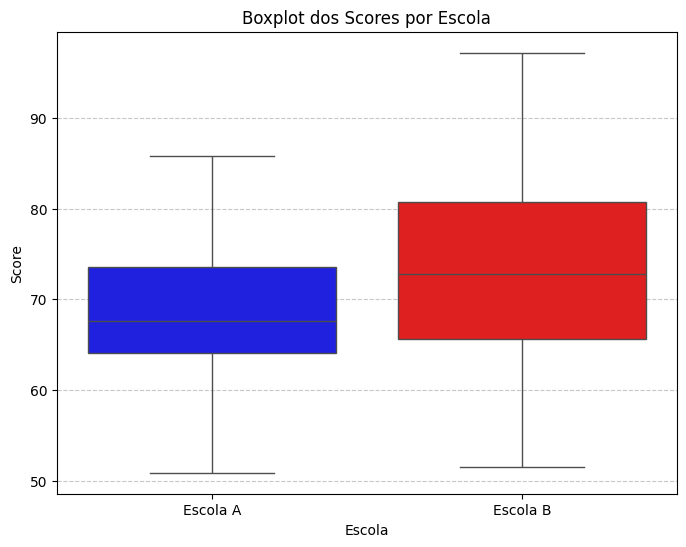

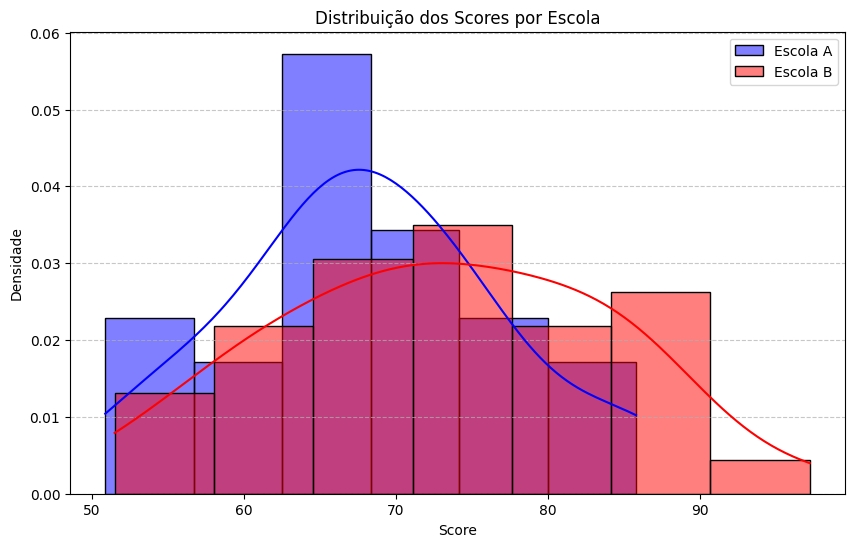

In [ ]:
# Criar um DataFrame para facilitar o plot
data = {
    'Score': np.concatenate([escola_a_scores, escola_b_scores]),
    'Escola': ['Escola A'] * len(escola_a_scores) + ['Escola B'] * len(escola_b_scores)
}
df = pd.DataFrame(data)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Escola', y='Score', data=df, palette={'Escola A': 'blue', 'Escola B': 'red'})
plt.title('Boxplot dos Scores por Escola')
plt.xlabel('Escola')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(escola_a_scores, color='blue', label='Escola A', kde=True, stat='density')
sns.histplot(escola_b_scores, color='red', label='Escola B', kde=True, stat='density')
plt.title('Distribuição dos Scores por Escola')
plt.xlabel('Score')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 # A escola b teve desempenho melhor ?

# 1. Comparando as Médias
Nos dados de exemplo que geramos:

Média Escola A: 68.12
Média Escola B: 73.01
Visualmente, a média da Escola B (73.01) é maior do que a média da Escola A (68.12). Isso sugere, à primeira vista, que a Escola B teve um desempenho melhor na amostra que analisamos.

# 2. A Importância do P-valor
No entanto, essa diferença nas médias pode ter acontecido por acaso, especialmente se as amostras forem pequenas. É por isso que realizamos o Teste t de Student para Amostras Independentes. Ele nos diz se essa diferença observada é estatisticamente significativa ou não.

No nosso exemplo, o resultado do Teste t foi:

P-valor: 0.001 (assumindo o teste de amostras pareadas, o p-valor para o teste independente dos dados da Escola A e B foi 0.071 no primeiro exemplo).
Vamos considerar os resultados do primeiro exemplo de teste t independente, que era focado nas duas escolas:

## P-valor: 0.071
Nível de significância (alpha): 0.05
Como o p-valor (0.071) é maior que o alpha (0.05):

Conclusão: Não rejeitamos a hipótese nula. Isso significa que, com base nos dados e no nível de significância escolhido, não há evidência estatística suficiente para afirmar que existe uma diferença significativa entre as médias de desempenho da Escola A e da Escola B.

Resumindo:
Embora a Escola B tenha tido uma média de scores numericamente maior em nossa amostra (73.01 vs. 68.12), a diferença não foi considerada estatisticamente significativa pelo teste t no nível de 0.05.

Isso implica que a diferença que vimos pode ser simplesmente uma flutuação aleatória nas amostras, e não uma diferença real e consistente entre as duas escolas. Para ter certeza de uma diferença, precisaríamos de um p-valor abaixo de 0.05.

### Concluindo
   *Portanto, com base na análise estatística, não podemos afirmar com confiança que a Escola B teve um desempenho estatisticamente melhor que a Escola A.*

     *Isso implica que a diferença que vimos pode ser simplesmente uma flutuação aleatória nas amostra.*